In [36]:
import pandas as pnd
import numpy as num
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [37]:
Topic=pnd.read_csv("spam_base.names" , skiprows= 32 ,sep="\s+", engine="python", names=["attr",""])
Topic=Topic["attr"]
Topic=list(Topic)
Topic.append("spam_data")
Topic

['word_freq_make:',
 'word_freq_address:',
 'word_freq_all:',
 'word_freq_3d:',
 'word_freq_our:',
 'word_freq_over:',
 'word_freq_remove:',
 'word_freq_internet:',
 'word_freq_order:',
 'word_freq_mail:',
 'word_freq_receive:',
 'word_freq_will:',
 'word_freq_people:',
 'word_freq_report:',
 'word_freq_addresses:',
 'word_freq_free:',
 'word_freq_business:',
 'word_freq_email:',
 'word_freq_you:',
 'word_freq_credit:',
 'word_freq_your:',
 'word_freq_font:',
 'word_freq_000:',
 'word_freq_money:',
 'word_freq_hp:',
 'word_freq_hpl:',
 'word_freq_george:',
 'word_freq_650:',
 'word_freq_lab:',
 'word_freq_labs:',
 'word_freq_telnet:',
 'word_freq_857:',
 'word_freq_data:',
 'word_freq_415:',
 'word_freq_85:',
 'word_freq_technology:',
 'word_freq_1999:',
 'word_freq_parts:',
 'word_freq_pm:',
 'word_freq_direct:',
 'word_freq_cs:',
 'word_freq_meeting:',
 'word_freq_original:',
 'word_freq_project:',
 'word_freq_re:',
 'word_freq_edu:',
 'word_freq_table:',
 'word_freq_conference:',
 '

In [38]:
Data = pnd.read_csv("spam_base.data" , names=Topic , header=None)

In [39]:
print(Data.head)

<bound method NDFrame.head of       word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0                0.00                0.64            0.64            0.0   
1                0.21                0.28            0.50            0.0   
2                0.06                0.00            0.71            0.0   
3                0.00                0.00            0.00            0.0   
4                0.00                0.00            0.00            0.0   
...               ...                 ...             ...            ...   
4596             0.31                0.00            0.62            0.0   
4597             0.00                0.00            0.00            0.0   
4598             0.30                0.00            0.30            0.0   
4599             0.96                0.00            0.00            0.0   
4600             0.00                0.00            0.65            0.0   

      word_freq_our:  word_freq_over:  word_freq_remove: 

In [40]:
Data.describe

<bound method NDFrame.describe of       word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0                0.00                0.64            0.64            0.0   
1                0.21                0.28            0.50            0.0   
2                0.06                0.00            0.71            0.0   
3                0.00                0.00            0.00            0.0   
4                0.00                0.00            0.00            0.0   
...               ...                 ...             ...            ...   
4596             0.31                0.00            0.62            0.0   
4597             0.00                0.00            0.00            0.0   
4598             0.30                0.00            0.30            0.0   
4599             0.96                0.00            0.00            0.0   
4600             0.00                0.00            0.65            0.0   

      word_freq_our:  word_freq_over:  word_freq_remo

In [15]:
print((Data.duplicated().value_counts()))

False    4210
True      391
dtype: int64


In [41]:
Data = Data.drop_duplicates()
Data.head

<bound method NDFrame.head of       word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
0                0.00                0.64            0.64            0.0   
1                0.21                0.28            0.50            0.0   
2                0.06                0.00            0.71            0.0   
3                0.00                0.00            0.00            0.0   
4                0.00                0.00            0.00            0.0   
...               ...                 ...             ...            ...   
4596             0.31                0.00            0.62            0.0   
4597             0.00                0.00            0.00            0.0   
4598             0.30                0.00            0.30            0.0   
4599             0.96                0.00            0.00            0.0   
4600             0.00                0.00            0.65            0.0   

      word_freq_our:  word_freq_over:  word_freq_remove: 

In [17]:
Data.isna().sum()

word_freq_make:                0
word_freq_address:             0
word_freq_all:                 0
word_freq_3d:                  0
word_freq_our:                 0
word_freq_over:                0
word_freq_remove:              0
word_freq_internet:            0
word_freq_order:               0
word_freq_mail:                0
word_freq_receive:             0
word_freq_will:                0
word_freq_people:              0
word_freq_report:              0
word_freq_addresses:           0
word_freq_free:                0
word_freq_business:            0
word_freq_email:               0
word_freq_you:                 0
word_freq_credit:              0
word_freq_your:                0
word_freq_font:                0
word_freq_000:                 0
word_freq_money:               0
word_freq_hp:                  0
word_freq_hpl:                 0
word_freq_george:              0
word_freq_650:                 0
word_freq_lab:                 0
word_freq_labs:                0
word_freq_

In [42]:
x = Data.drop(columns=["spam_data"])
x

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [19]:
y =Data.drop(columns=["spam_data"])
y

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,word_freq_conference:,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [43]:
from sklearn.model_selection import train_test_split
x_trains ,x_tests, y_trains ,y_tests = train_test_split(x,y,random_state=6, train_size=0.3)

In [45]:
from sklearn.preprocessing import StandardScaler
standard_scaler =StandardScaler()
standard_scaler.fit(x)
scaled_datas = standard_scaler.transform(x_trains)

x_tests_scaled = standard_scaler.transform(x_tests)

In [46]:
from sklearn.decomposition import PCA
PCA = PCA()
X_PCA= PCA.fit_transform(scaled_datas)

Text(0, 0.5, 'Variance')

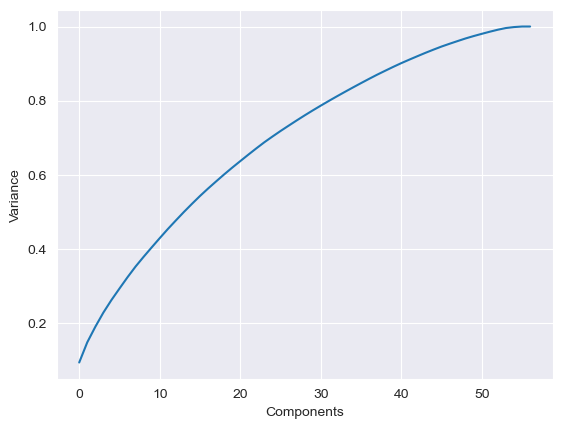

In [47]:

import matplotlib.pyplot as plot
plot.plot(num.cumsum(PCA.explained_variance_ratio_))
plot.xlabel("Components")
plot.ylabel("Variance")

In [52]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=7)
X_PCA = PCA.fit(scaled_datas)
x_tests_PCA = PCA.fit(x_tests_scaled)

In [53]:
X_PCA =PCA.transform(scaled_datas)
x_tests_PCA = PCA.transform(x_tests_scaled)

print(scaled_datas.shape)
print(X_PCA.shape)

(1263, 57)
(1263, 7)


In [54]:
X_PCA

array([[-0.53262206, -0.99050325, -0.39147676, ...,  0.1497997 ,
         0.09408644, -0.09978405],
       [-0.62747961, -0.89823751, -0.49528213, ..., -0.25972594,
        -1.03445363, -0.10162358],
       [-0.77123954,  0.07337158, -0.7833898 , ...,  0.05409387,
         0.60596002,  0.31431571],
       ...,
       [ 3.48282767, -0.91965784,  0.27803703, ..., -0.64252243,
        -0.5589948 , -0.14377978],
       [-1.46017417,  2.87381807, -1.78983023, ..., -0.50109969,
         2.11775084,  0.31035814],
       [-0.43499411, -0.78187651,  0.20081808, ..., -0.31925395,
        -0.28754279,  0.06934275]])

In [55]:
x_tests_PCA

array([[-1.18491649,  2.31167863,  0.37688743, ...,  0.73557438,
        -1.33809161, -3.12880081],
       [-0.26658311, -0.80103671,  0.70908069, ..., -0.34895082,
        -0.57560934, -0.01981044],
       [-0.45066819, -1.47876807, -0.03267702, ..., -0.30206946,
        -0.29064248, -0.06640281],
       ...,
       [-0.52342109, -0.58812219,  0.9413286 , ...,  0.55844827,
         0.41889519, -1.03507214],
       [-1.22108763,  1.38492969, -0.7421218 , ...,  0.92310853,
        -1.84216237, -0.04772913],
       [-0.38047331, -0.35297204,  0.53504604, ...,  0.38920702,
         0.13809603,  0.21816328]])

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not       word_freq_make:  word_freq_address:  word_freq_all:  word_freq_3d:  \
308              0.00                0.00            0.00            0.0   
4329             0.74                0.00            0.00            0.0   
1026             0.00                0.00            0.00            0.0   
2738             0.00                0.26            0.26            0.0   
1059             0.00                0.00            0.00            0.0   
...               ...                 ...             ...            ...   
906              0.00                0.00            0.00            0.0   
372              0.20                0.81            0.61            0.0   
2144             0.00                0.00            0.00            0.0   
245              0.00                0.00            1.43            0.0   
2952             0.00                0.00            0.42            0.0   

      word_freq_our:  word_freq_over:  word_freq_remove:  word_freq_internet:  \
308             0.00              0.0               0.00                 0.00   
4329            0.00              0.0               0.00                 0.00   
1026            0.80              0.0               0.00                 0.00   
2738            0.26              0.0               0.00                 0.26   
1059            0.00              0.0               0.45                 0.00   
...              ...              ...                ...                  ...   
906             0.00              0.0               0.00                 2.50   
372             0.00              0.0               0.00                 0.00   
2144            0.00              0.0               0.00                 0.00   
245             0.71              0.0               0.00                 0.71   
2952            0.00              0.0               0.21                 0.00   

      word_freq_order:  word_freq_mail:  ...  word_freq_conference:  \
308                0.0             0.00  ...                   0.00   
4329               0.0             0.00  ...                   0.00   
1026               0.0             0.00  ...                   0.00   
2738               0.0             0.00  ...                   0.00   
1059               0.0             0.45  ...                   0.00   
...                ...              ...  ...                    ...   
906                0.0             0.00  ...                   0.00   
372                0.2             0.00  ...                   0.00   
2144               0.0             0.00  ...                   1.66   
245                0.0             0.71  ...                   0.00   
2952               0.0             0.21  ...                   0.00   

      char_freq_;:  char_freq_(:  char_freq_[:  char_freq_!:  char_freq_$:  \
308          0.000         0.000         0.000         0.309         0.000   
4329         0.000         0.000         0.000         0.377         0.000   
1026         0.000         0.274         0.000         0.823         0.000   
2738         0.000         0.111         0.000         0.000         0.037   
1059         0.000         0.000         0.000         0.037         0.150   
...            ...           ...           ...           ...           ...   
906          0.000         0.182         0.000         0.000         0.182   
372          0.000         0.000         0.000         0.831         0.338   
2144         0.000         0.000         0.000         0.000         0.000   
245          0.000         0.000         0.000         0.937         0.000   
2952         0.034         0.139         0.034         0.000         0.069   

      char_freq_#:  capital_run_length_average:  capital_run_length_longest:  \
308          0.000                        1.333                           11   
4329         0.000                        1.000                            1   
1026         0.000                        2.815                           29   
2738         0.000                        1.564                            8   
1059         1.584                       13.936                          114   
...            ...                          ...                          ...   
906          0.000                        3.545                           21   
372          0.030                     1102.500                         2204   
2144         0.530                        4.052                           22   
245          0.000                       11.888                          116   
2952         0.000                        3.151                           37   

      capital_run_length_total:  
308                          56  
4329                         33  
1026                        107  
2738                        194  
1059                       1324  
...                         ...  
906                          78  
372                        2205  
2144                         77  
245                         214  
2952                        312  

[1263 rows x 57 columns]

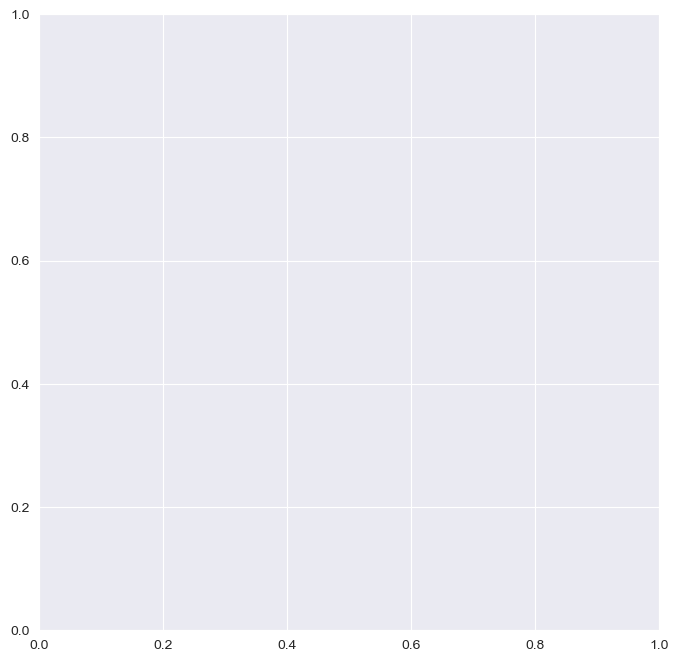

In [65]:
plot.figure(figsize= (8,8))
plot.scatter(X_PCA[:,0],X_PCA[:,1], c= y_trains)
plot.xlabel("1st PCA")
plot.ylabel("6th PCA")

In [62]:
from sklearn.preprocessing import StandardScaler
x_stand =StandardScaler()
x_trains =x_stand.fit_transform(x_trains)
x_tests = x_stand.transform(x_tests)
len(y_tests)

2947

In [58]:
import math
print(math.sqrt(len(y_tests)))

54.286278192559855


In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric="euclidean")

knn = KNeighborsClassifier(n_neighbors=5,metric="euclidean")

In [63]:
classifier.fit(x_trains,y_trains)

ValueError: Unknown label type: 'continuous-multioutput'

In [211]:
knn.fit(x_trains,y_trains)

ValueError: Unknown label type: 'continuous-multioutput'

In [189]:
Y_predict= classifier.predict(x_tests)
Y_predict

AttributeError: 'KNeighborsClassifier' object has no attribute 'n_samples_fit_'